In [1]:
#Теркалов Андрей Сергеевич
#Вариант 11
#Модель InceptionResNetV2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import (
    preprocess_input,
    decode_predictions
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve
)

In [3]:
imagenet_model = InceptionResNetV2(
    weights="imagenet",
    include_top=True
)

imagenet_model.summary()

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 55,873,736 (213.14 MB)

 Trainable params: 55,813,192 (212.91 MB)

 Non-trainable params: 60,544 (236.50 KB)

(np.float64(-0.5), np.float64(298.5), np.float64(298.5), np.float64(-0.5))

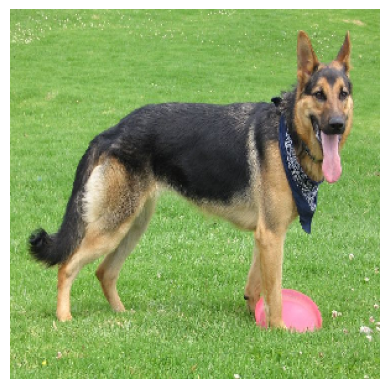

In [4]:
from tensorflow.keras.preprocessing import image

img = image.load_img("dog.jpg", target_size=(299, 299))
plt.imshow(img)
plt.axis("off")

In [5]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = imagenet_model.predict(x)
decode_predictions(preds, top=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


[[('n02106662', 'German_shepherd', np.float32(0.9196599)),
  ('n02105162', 'malinois', np.float32(0.0053497814)),
  ('n02105412', 'kelpie', np.float32(0.0014656658))]]

In [21]:
import tensorflow_datasets as tfds

ds_train, ds_test = tfds.load(
    "horses_or_humans",
    split=["train", "test"],
    as_supervised=True
)

In [22]:
import collections

counter = collections.Counter()

for _, label in ds_train:
    counter[int(label.numpy())] += 1

counter

Counter({1: 527, 0: 500})

In [23]:
import pandas as pd

df_horses_balance = pd.DataFrame.from_dict(
    {
        "horses": counter[0],
        "humans": counter[1]
    },
    orient="index",
    columns=["count"]
)

df_horses_balance

,count
horses,500
humans,527


In [24]:
base_dir = "cats_vs_dogs"

class_counts = {
    "Cat": len(os.listdir(os.path.join(base_dir, "Cat"))),
    "Dog": len(os.listdir(os.path.join(base_dir, "Dog")))
}

df_balance = pd.DataFrame.from_dict(
    class_counts, orient="index", columns=["count"]
)

df_balance

,count
Cat,12499
Dog,12499


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

cats_train_gen = datagen.flow_from_directory(
    "cats_vs_dogs",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
    shuffle=True
)

cats_test_gen = datagen.flow_from_directory(
    "cats_vs_dogs",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [26]:
import tensorflow_datasets as tfds
import tensorflow as tf

(ds_horses_train, ds_horses_test), ds_info = tfds.load(
    "horses_or_humans",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

In [27]:
def preprocess(image, label):
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_horses_train = (
    ds_horses_train
    .map(preprocess)
    .batch(batch_size)
    .shuffle(1000)
)

ds_horses_test = (
    ds_horses_test
    .map(preprocess)
    .batch(batch_size)
)

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

custom_model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(1, activation="sigmoid")
])

custom_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

custom_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_203 (Conv2D)                  │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_204 (Conv2D)                  │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_205 (Conv2D)                  │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history_custom_cats = custom_model.fit(
    cats_train_gen,
    epochs=5,
    validation_data=cats_test_gen
)

Epoch 1/5
224/625 ━━━━━━━━━━━━━━━━━━━━ 1:44 261ms/step - accuracy: 0.5710 - loss: 0.6872

C:\Users\redmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 273ms/step - accuracy: 0.6780 - loss: 0.5913 - val_accuracy: 0.7519 - val_loss: 0.4997
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.7753 - loss: 0.4753 - val_accuracy: 0.7705 - val_loss: 0.4664
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8152 - loss: 0.4054 - val_accuracy: 0.8089 - val_loss: 0.4128
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.8535 - loss: 0.3368 - val_accuracy: 0.8203 - val_loss: 0.4033
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.8866 - loss: 0.2651 - val_accuracy: 0.8215 - val_loss: 0.3996


In [30]:
history_custom_horses = custom_model.fit(
    ds_horses_train,
    epochs=5,
    validation_data=ds_horses_test
)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.7810 - loss: 0.5176 - val_accuracy: 0.9463 - val_loss: 0.1504
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.9599 - loss: 0.1078 - val_accuracy: 0.9854 - val_loss: 0.0309
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.9903 - loss: 0.0375 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.9951 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.9976 - loss: 0.0093 - val_accuracy: 0.9854 - val_loss: 0.0388


In [31]:
from tensorflow.keras.applications import InceptionResNetV2

base_model = InceptionResNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [32]:
tl_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

tl_model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

tl_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (None, 5, 5, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,730,465 (208.78 MB)

 Trainable params: 393,729 (1.50 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

In [33]:
history_tl_cats = tl_model.fit(
    cats_train_gen,
    epochs=5,
    validation_data=cats_test_gen
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 690s 1s/step - accuracy: 0.9827 - loss: 0.0526 - val_accuracy: 0.9914 - val_loss: 0.0347
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.9901 - loss: 0.0316 - val_accuracy: 0.9906 - val_loss: 0.0320
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 678s 1s/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 0.9896 - val_loss: 0.0316
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 669s 1s/step - accuracy: 0.9919 - loss: 0.0236 - val_accuracy: 0.9892 - val_loss: 0.0313
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.9934 - loss: 0.0216 - val_accuracy: 0.9892 - val_loss: 0.0319


In [34]:
history_tl_horses = tl_model.fit(
    ds_horses_train,
    epochs=5,
    validation_data=ds_horses_test
)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8650 - loss: 0.3712 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9976 - loss: 0.0144 - val_accuracy: 0.9951 - val_loss: 0.0064
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9988 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9988 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9976 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0023


In [35]:
import numpy as np

y_true = cats_test_gen.classes
y_pred_prob = tl_model.predict(cats_test_gen)
y_pred = (y_pred_prob > 0.5).astype(int)

157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 886ms/step


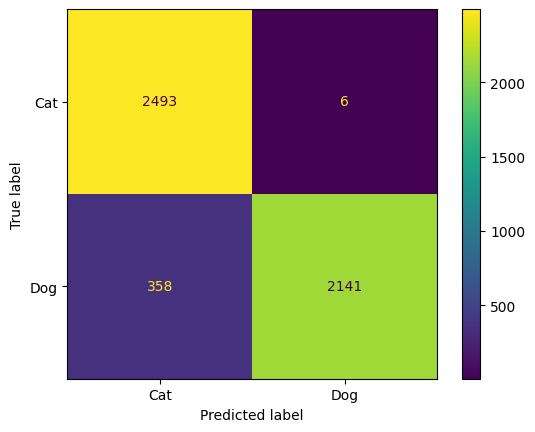

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Cat", "Dog"])
disp.plot()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1:", f1_score(y_true, y_pred))

Accuracy: 0.927170868347339
Precision: 0.9972054028877504
Recall: 0.8567426970788315
F1: 0.9216530348687043


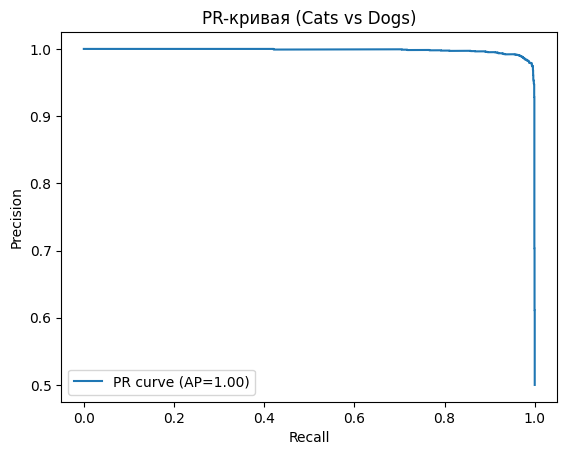

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
ap = average_precision_score(y_true, y_pred_prob)

plt.plot(recall, precision, label=f"PR-кривая (AP={ap:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-кривая (Cats vs Dogs)")
plt.legend()
plt.show()